# Cosette Hampton, Assignment 3 

MACSS 3000, Fall 2018 

Date: 10/23/2018 

In [1]:
#Importing packages 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.ticker import MultipleLocator
from scipy import stats

## Question 2: Simulating your Income (7 pts)

### Part A

In [2]:
#Constructing a simulation profile (p)
p = {
        'sd'          : 0.13,       #standard deviation
        'pr'          : 0.4,        #persistance
        'gr'          : 0.025,      #growth rate
        'inc'         : 80000,      #starting income
        'st_yr'       : int(2020),  #start year
        'lf_yrs'      : 40,         #years to work 
        'sz'          : 40,         #size of matrix
        'mu'          : 0,          #mean
        'num_draws'   : 10000       #simulations
    }


In [3]:
#Definining the function 

def income_process(p):

    #set random seed
    np.random.seed(p['num_draws'])

    errors = np.random.normal(p['mu'], p['sd'], p['sz'])

    #create a matrix of dim (lf_years, num_draws)
    ln_wealth_mat = np.zeros((p['lf_yrs'], p['num_draws']))

    #fill the matrix
    ln_wealth_mat = np.log(p['inc']) + errors

    #loop and apply model
    for yr in range(p['st_yr'], p['lf_yrs']):
        ln_wealth_mat[yr, :] = ((1-p['pr'])*(np.log(p['inc']) + p['gr']*(p['st_yr'] - 2020)) + 
                               p['pr']*ln_wealth_mat[yr - 1, :] + np.log(errors[yr, :])) 

    wealth_mat = np.exp(ln_wealth_mat) #dealing with large numbers so put in terms of 10k's
    
    return wealth_mat

#Should the errors have been set to 10,000 instead of 40, as given in the assignment? 
#If so, switch out values with the following: 

errors = np.random.normal(p['mu'], p['sd'], p['num_draws'])

    ##create a matrix of dim (lf_years, num_draws)
ln_wealth_mat = np.zeros((p['lf_yrs'], p['num_draws']))

    ##fill the matrix
ln_wealth_mat = np.log(p['inc']) + errors
ln_wealth_mat

In [4]:
#Printing to see the wealth matrix 

wealth_mat = income_process(p)
print(wealth_mat)

[ 67815.09779502  81852.95897264  76977.91062508  83473.34679264
  70490.79334065  82403.27366918  71917.09441333  81122.92253748
  90813.93352897  80857.08707533  75193.56877935  65893.79863467
  75912.10756892  87562.06089847  82237.09672169  80951.91316642
  65410.02476962  79535.15128164  97944.97754976 103043.47877503
  72237.4363042   60577.83595     67875.35613242  83127.44964139
  88842.95312587  82940.5242757   68055.7198545   88621.30603298
  88216.19723661  81819.3719538   72683.03495541  90742.1035545
  73552.42824064 101237.46905956  70334.9480983   66956.41979281
  80757.40491532  84361.33514544  81774.64466623  74125.1939492 ]


Text(0,0.5,'Annual salary (\\$)')

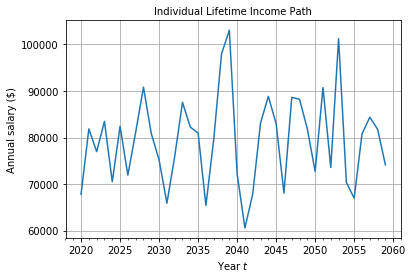

In [5]:
# Part (A) - plotting a lifetime income path 

%matplotlib inline
year_vec = np.arange(p['st_yr'], p['st_yr'] + p['lf_yrs'])
individual = 1
fig, ax = plt.subplots()
plt.plot(year_vec, wealth_mat) #was wealth_mat[:, individual]
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
plt.grid(b=True, which='major', color='0.65', linestyle='-')
plt.title('Individual Lifetime Income Path', fontsize=10)
plt.xlabel(r'Year $t$')
plt.ylabel(r'Annual salary (\$)')

### Part B

Text(0.5,1,'Distribution of Wealth in First Year among MACSS Participants')

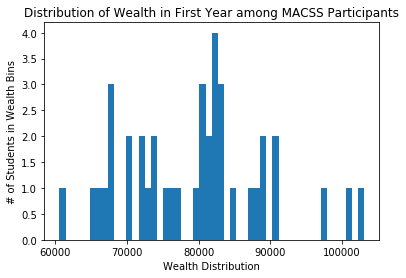

In [6]:
#Histogram
plt.hist(wealth_mat, bins=50)
plt.xlabel("Wealth Distribution") 
plt.ylabel("# of Students in Wealth Bins")
plt.title("Distribution of Wealth in First Year among MACSS Participants")

In [7]:
propn_rich = len(wealth_mat[wealth_mat > 100000])/len(wealth_mat)

print("Percentage of classmates with incomes above $100,000: "+"{:.2%}".format(propn_rich))


Percentage of classmates with incomes above $100,000: 5.00%


In [8]:
propn_lowball =  len(wealth_mat[ wealth_mat < 70000])/len(wealth_mat)

print("Percentage of classmates with incomes below $70,000: "+"{:.2%}".format(propn_lowball))

Percentage of classmates with incomes below $70,000: 17.50%


In [9]:
#Is the distribution normally distributed? Answered using a "Normaltest"

#Used https://stackoverflow.com/questions/12838993/scipy-normaltest-how-is-it-used to find this

zscore, pval = stats.normaltest(wealth_mat)
alpha = 0.01 


if(pval < alpha):
    print("Not normal distribution")
else: 
    print("Yes, it is normally distributed")

Yes, it is normally distributed


Yes, this distribution shows symmetry and a bell-curve and is normally distributed


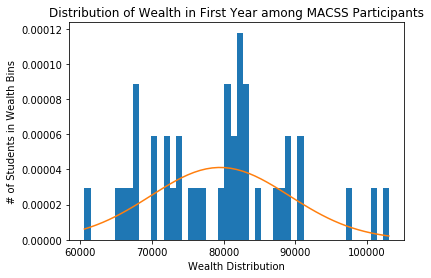

In [10]:
# Code edited from: https://stackoverflow.com/questions/22179119/normality-test-of-a-distribution-in-python

n, bins, patches = plt.hist(wealth_mat, 50, normed=1)
mu = np.mean(wealth_mat)
sigma = np.std(wealth_mat)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.xlabel("Wealth Distribution") 
plt.ylabel("# of Students in Wealth Bins")
plt.title("Distribution of Wealth in First Year among MACSS Participants")

print("Yes, this distribution shows symmetry and a bell-curve and is normally distributed")

### Part C

In [11]:
#Constructing a simulation profile (d)
d = {
        'dt'          : 95000,         #debt
        'dpr'         : 0.1,           #debt payment rate
        'st_yr'       : int(2020),     #start year
        'lf_yrs'      : 40            #years to work 
    }


In [12]:
#Defining a function that gives the number of years to pay off debt
def debt_length(d):
    np.random.seed(p['num_draws'])

    #loop and apply model
    pay_mat = np.ceil(d['dt']/(d['dpr']*wealth_mat))
        
    return pay_mat

I used np.ceil to round up decimals to the closest integer, or year. Should it have not been? Leave it at d['dt']/(d['dpr']*wealth_mat) if so. 

In [13]:
#Calling the array of years needed to pay off debt from function
time_til_paid = debt_length(d)
time_til_paid

array([15., 12., 13., 12., 14., 12., 14., 12., 11., 12., 13., 15., 13.,
       11., 12., 12., 15., 12., 10., 10., 14., 16., 14., 12., 11., 12.,
       14., 11., 11., 12., 14., 11., 13., 10., 14., 15., 12., 12., 12.,
       13.])

Text(0.5,1,'Years Needed to Pay off $95000 Loan')

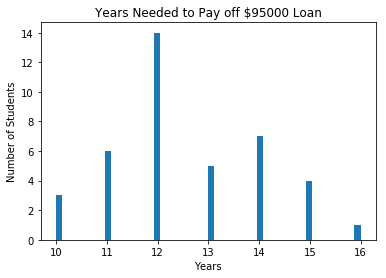

In [14]:
#Giving the histogram 
plt.hist(time_til_paid, bins=50)
plt.xlabel("Years")
plt.ylabel("Number of Students")
plt.title("Years Needed to Pay off $95000 Loan")

In [15]:
propn_paid = len(time_til_paid[time_til_paid <= 10])/len(time_til_paid)

print("Percentage of Simulations Paid in 10 Years or Less: "+"{:.2%}".format(propn_paid))

Percentage of Simulations Paid in 10 Years or Less: 7.50%


### Part D

In [16]:
#Re-constructing a simulation profile (p)
p = {
        'sd'          : 0.17,       #standard deviation
        'pr'          : 0.4,        #persistance
        'gr'          : 0.025,      #growth rate
        'inc'         : 90000,      #starting income
        'st_yr'       : int(2020),  #start year
        'lf_yrs'      : 40,         #years to work 
        'sz'          : 40,         #size of matrix
        'mu'          : 0,          #mean
        'num_draws'   : 10000       #simulations
    }

In [17]:
wealth_mat = income_process(p)
print(wealth_mat)

[ 72509.98391581  92735.65003856  85580.10913995  95143.6228217
  76273.71391708  93551.81378323  78298.14431422  91655.5477433
 106230.03324254  91262.98011502  82995.28842286  69835.36256345
  84033.92862603 101283.34404711  93305.18187174  91402.96730682
  69165.65196158  89316.74817513 117267.70947653 125313.48603542
  78754.53402705  62561.09760529  72594.25013008  94628.38564473
 103225.18312114  94350.22195696  72846.61114201 102888.54486666
 102273.93395534  92685.8921499   79390.4123873  106120.16978796
  80634.50619179 122449.13957379  76053.27219515  71311.7047773
  91115.87859435  96469.34692725  92619.64013467  81456.60789502]


In [18]:
time_til_paid = debt_length(d)
time_til_paid

array([14., 11., 12., 10., 13., 11., 13., 11.,  9., 11., 12., 14., 12.,
       10., 11., 11., 14., 11.,  9.,  8., 13., 16., 14., 11., 10., 11.,
       14., 10., 10., 11., 12.,  9., 12.,  8., 13., 14., 11., 10., 11.,
       12.])

Text(0.5,1,'Years Needed to Pay off $95000 Loan')

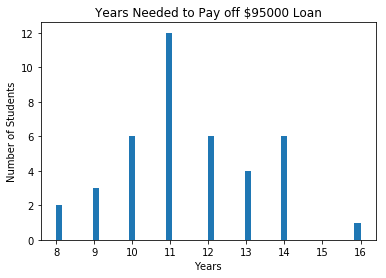

In [19]:
#New Histogram
plt.hist(time_til_paid, bins=50)
plt.xlabel("Years")
plt.ylabel("Number of Students")
plt.title("Years Needed to Pay off $95000 Loan")

In [20]:
propn_paid = len(time_til_paid[time_til_paid <= 10])/len(time_til_paid)

print("Percentage of Simulations Paid in 10 Years or Less: "+"{:.2%}".format(propn_paid))

Percentage of Simulations Paid in 10 Years or Less: 27.50%


## End